In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

import missingno
import sklearn

from xgboost import XGBClassifier
from xgboost import plot_tree

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))



In [2]:
# Prepare variables by dropping id & target for X, and just add the target to Y 
#X = df.drop(['city', 'city_development_index'], axis = 1)
X = df.drop(['enrollee_id','target'], axis = 1)
Y = df['target']

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


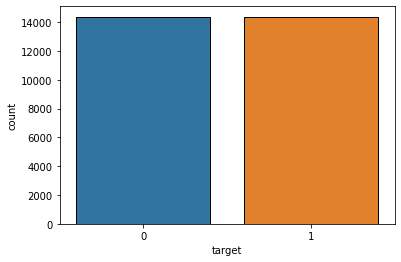

In [3]:
smote = SMOTE(random_state = 402)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [4]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
3274,1,0,3,0,8,4,4,1,64,0.624,1,5
6325,1,0,2,0,16,5,0,1,6,0.924,1,133
2425,2,1,3,0,11,3,1,5,95,0.855,0,78
15404,1,0,2,0,10,3,0,4,83,0.762,1,83
26265,1,0,2,0,18,4,0,1,5,0.920,1,146


In [5]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,-0.158877,1.311303,-0.094119,-0.315347,-0.643735,1.119834,2.918753,-0.507499,-1.167998,0.880684,-1.306635,0.831760
1,-0.158877,-0.536340,-0.094119,-0.315347,0.551250,0.508426,-0.523380,1.973081,0.107620,0.880684,-1.306635,-0.568720
2,-0.158877,-0.536340,1.484501,-0.315347,1.746234,0.508426,-0.523380,1.973081,-0.443215,0.706612,0.765325,-0.705352
3,-4.098627,-0.536340,-0.094119,-0.315347,-0.195616,0.508426,-0.523380,-0.507499,0.078629,0.816469,-1.306635,-0.192981
4,-0.158877,-0.536340,-0.094119,-0.315347,-0.942481,-0.714389,-0.523380,-1.127644,0.542490,-1.359553,-1.306635,-0.056349


In [6]:
Y_train.value_counts(normalize=True)

1    0.500022
0    0.499978
Name: target, dtype: float64

In [7]:
Y_test.value_counts(normalize=True)

0    0.500087
1    0.499913
Name: target, dtype: float64

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# ----------------- End of Data Prep ----------------- 

In [9]:
%%time
clf = MLPClassifier(max_iter = 2000, hidden_layer_sizes=(5,4,2), random_state = 42 )
clf.fit(X_train, Y_train)

CPU times: user 8.38 s, sys: 4.24 ms, total: 8.38 s
Wall time: 10.2 s


MLPClassifier(hidden_layer_sizes=(5, 4, 2), max_iter=2000, random_state=42)

In [10]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 30.2 ms, sys: 29.1 ms, total: 59.3 ms
Wall time: 44.3 ms


In [11]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8106661537977985
Test AUC Score 0.8136562676602066
 
Acuracy  0.742569094385538
ROC_AUC  0.8136562676602066
PR  0.7958719126064403
 
[[2142  735]
 [ 746 2130]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2877
           1       0.74      0.74      0.74      2876

    accuracy                           0.74      5753
   macro avg       0.74      0.74      0.74      5753
weighted avg       0.74      0.74      0.74      5753



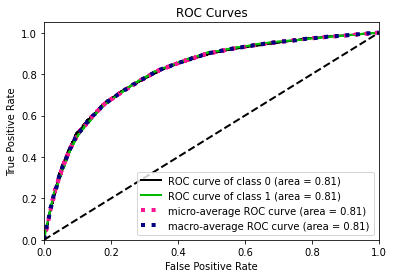

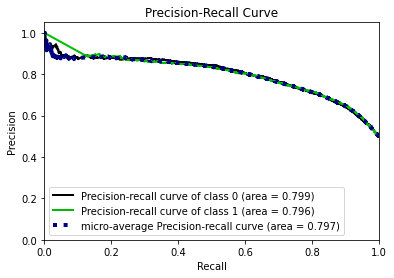

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

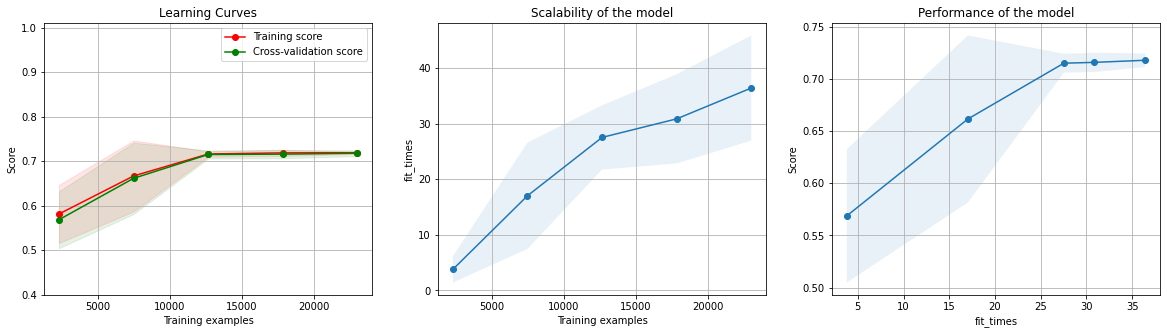

In [12]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

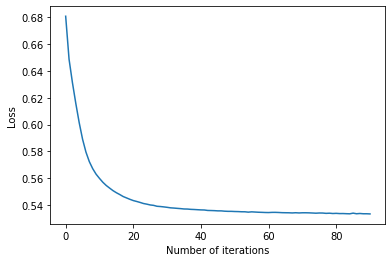

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

In [14]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 4, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [15]:
%%time
parameter_space = {
    'hidden_layer_sizes': [ (1,2),(7,1), (10,7,5), (5,10,5), (15,10,2)]
    ,'random_state' : [42]
    #'activation': ['logistic', 'relu']
   # ,'alpha': [0.0001, 0.0005, 0.001]
   # ,'learning_rate' : ['constant', 'adaptive']
}

eval_set = [(X_test, Y_test)]
GridSearch = GridSearchCV(MLPClassifier(max_iter=2000), param_grid = parameter_space, n_jobs=-1, cv=3)


CPU times: user 208 µs, sys: 11 µs, total: 219 µs
Wall time: 226 µs


In [16]:
%%time
GridSearch.fit(X_train, Y_train)

CPU times: user 16.6 s, sys: 4.89 ms, total: 16.6 s
Wall time: 2min 13s


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1, 2), (7, 1), (10, 7, 5),
                                                (5, 10, 5), (15, 10, 2)],
                         'random_state': [42]})

pd.DataFrame(GridSearch.cv_results_)

In [17]:
GridSearch.best_params_

{'hidden_layer_sizes': (10, 7, 5), 'random_state': 42}

In [18]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 4, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                  # activation = 'logistic',
                  # learning_rate = 'adaptive',
                    random_state = 42,
                    max_iter=2000).fit(X_train, Y_train)

CPU times: user 16.3 s, sys: 24.1 ms, total: 16.3 s
Wall time: 25.5 s


In [20]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 24.7 ms, sys: 8.26 ms, total: 33 ms
Wall time: 36.1 ms


In [21]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8266425441499402
Test AUC Score 0.8224570631883099
 
Acuracy  0.752998435598818
ROC_AUC  0.8224570631883099
PR  0.811491458276894
 
[[2157  720]
 [ 701 2175]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2877
           1       0.75      0.76      0.75      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



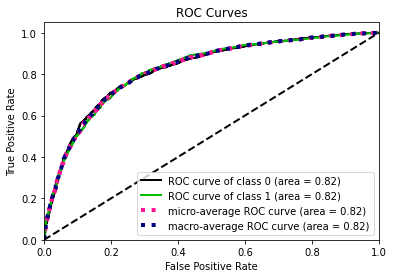

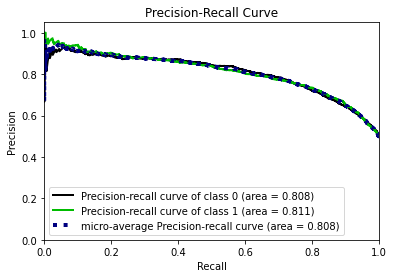

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

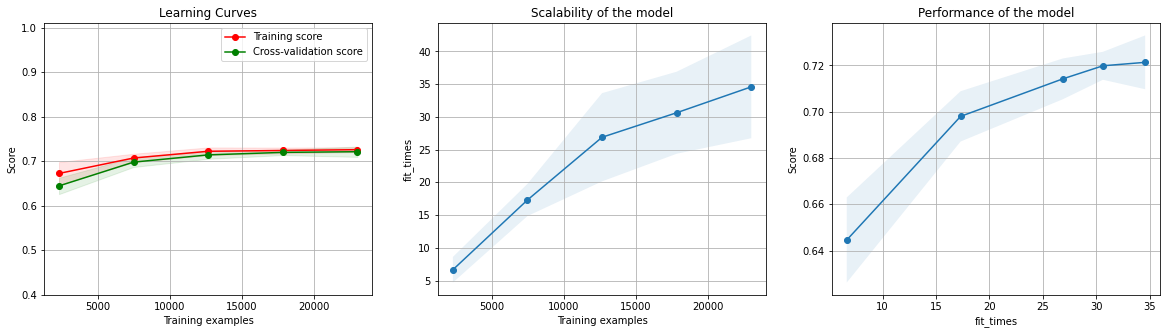

In [22]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

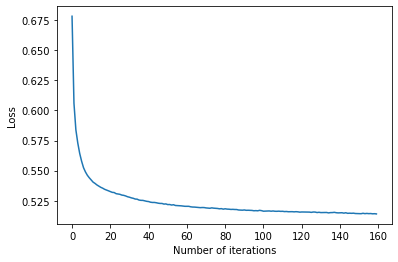

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

In [24]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 7, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [25]:
%%time
parameter_space = {
    #'hidden_layer_sizes': [ (1,2),(7,1), (10,7,5), (5,10,5), (15,10,2)]
    'hidden_layer_sizes' : [(10,7,5)]
    ,'activation': ['logistic', 'relu', 'tanh']
    ,'random_state' : [42]
   # ,'alpha': [0.0001, 0.0005, 0.001]
   # ,'learning_rate' : ['constant', 'adaptive']
}

eval_set = [(X_test, Y_test)]
GridSearch = GridSearchCV(MLPClassifier(max_iter=2000), param_grid = parameter_space, n_jobs=-1, cv=3)


CPU times: user 50 µs, sys: 2 µs, total: 52 µs
Wall time: 54.8 µs


In [26]:
%%time
GridSearch.fit(X_train, Y_train)

CPU times: user 16.4 s, sys: 17.5 ms, total: 16.4 s
Wall time: 1min 36s


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [(10, 7, 5)],
                         'random_state': [42]})

In [27]:
GridSearch.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (10, 7, 5), 'random_state': 42}

In [28]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                  # learning_rate = 'adaptive',
                    random_state = 42,
                    max_iter=2000).fit(X_train, Y_train)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 16.2 s, sys: 22.8 ms, total: 16.2 s
Wall time: 20 s


In [29]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8266425441499402
Test AUC Score 0.8224570631883099
 
Acuracy  0.752998435598818
ROC_AUC  0.8224570631883099
PR  0.811491458276894
 
[[2157  720]
 [ 701 2175]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2877
           1       0.75      0.76      0.75      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



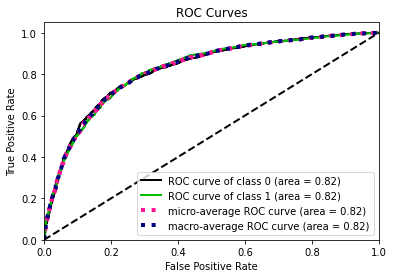

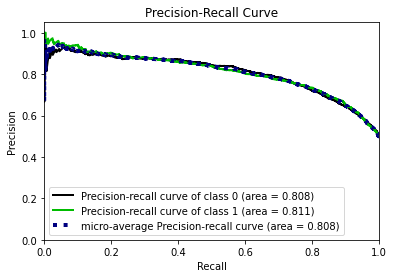

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

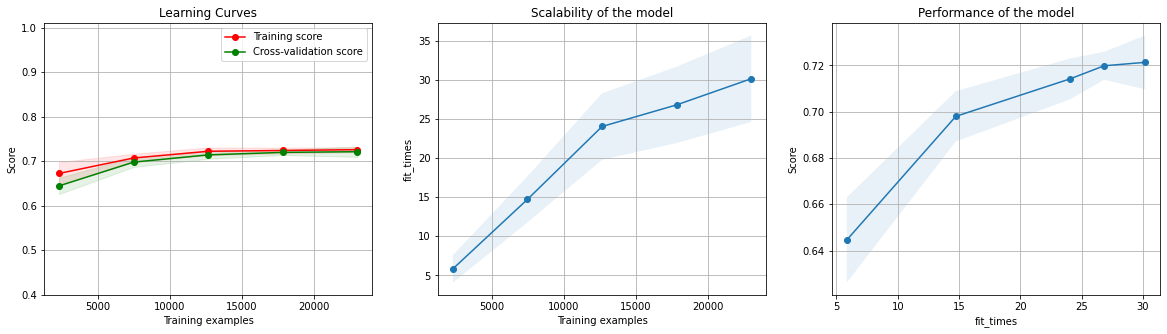

In [30]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

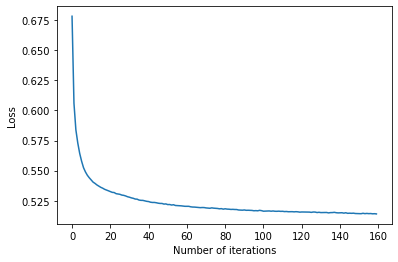

In [31]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

In [32]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'logistic',
                  # learning_rate = 'adaptive',
                    random_state = 42,
                    max_iter=2000).fit(X_train, Y_train)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 25.4 s, sys: 38 ms, total: 25.4 s
Wall time: 30.7 s


In [33]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8204353650737812
Test AUC Score 0.8184528341655536
 
Acuracy  0.7505649226490526
ROC_AUC  0.8184528341655536
PR  0.8025122833716045
 
[[2192  685]
 [ 750 2126]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2877
           1       0.76      0.74      0.75      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



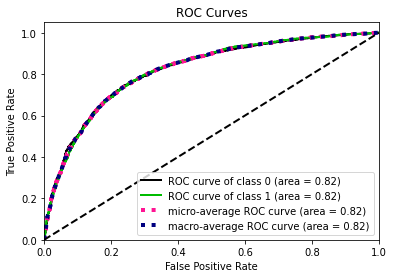

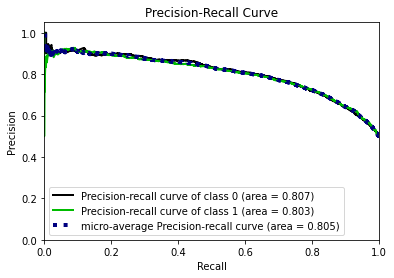

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

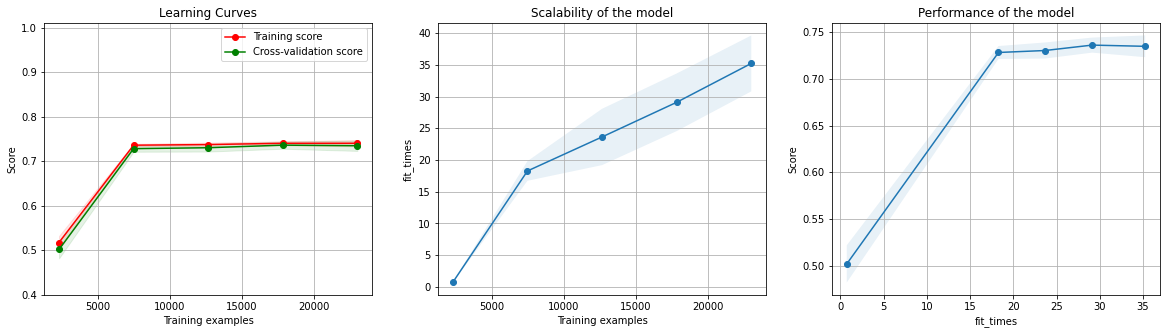

In [34]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [35]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'tanh',
                  # learning_rate = 'adaptive',
                    random_state = 42,
                    max_iter=2000).fit(X_train, Y_train)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 21.5 s, sys: 14.5 ms, total: 21.5 s
Wall time: 26.6 s


In [36]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8252675826075497
Test AUC Score 0.8206399805082079
 
Acuracy  0.7455240743959674
ROC_AUC  0.8206399805082079
PR  0.8114998884880442
 
[[2180  697]
 [ 767 2109]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2877
           1       0.75      0.73      0.74      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



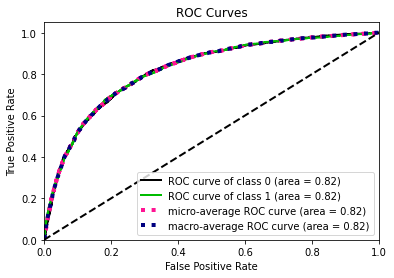

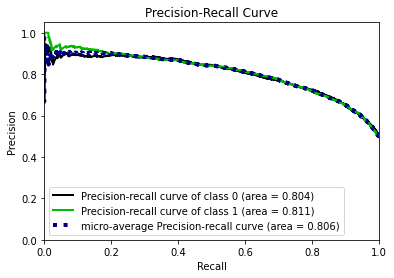

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

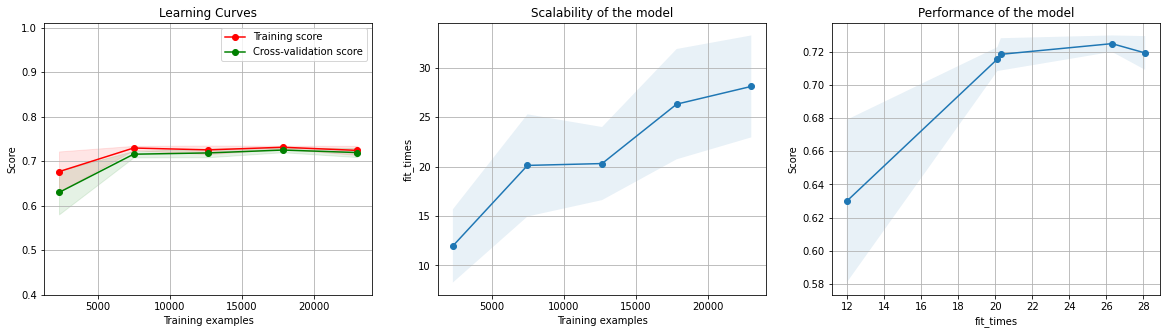

In [37]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [38]:
%%time
parameter_space = {
    #'hidden_layer_sizes': [ (1,2),(7,1), (10,7,5), (5,10,5), (15,10,2)]
    'hidden_layer_sizes' : [(10,7,5)]
    ,'activation': ['relu']
   # ,'alpha': [0.0001, 0.0005, 0.001]
    ,'learning_rate' : ['constant', 'adaptive']
    ,'random_state' : [42]
}

eval_set = [(X_test, Y_test)]
GridSearch = GridSearchCV(MLPClassifier(max_iter=2000), param_grid = parameter_space, n_jobs=-1, cv=3)


CPU times: user 78 µs, sys: 2 µs, total: 80 µs
Wall time: 83.2 µs


In [39]:
%%time
GridSearch.fit(X_train, Y_train)

CPU times: user 15.9 s, sys: 50.8 ms, total: 16 s
Wall time: 1min 34s


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(10, 7, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'random_state': [42]})

In [40]:
GridSearch.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (10, 7, 5),
 'learning_rate': 'constant',
 'random_state': 42}

In [42]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'constant',
                    learning_rate_init = 0.01,
                    random_state = 42,
                    max_iter=2000).fit(X_train, Y_train)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 6.33 s, sys: 11.5 ms, total: 6.35 s
Wall time: 6.32 s


In [43]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8327811681925801
Test AUC Score 0.8296470786724891
 
Acuracy  0.7578654614983487
ROC_AUC  0.8296470786724891
PR  0.8155877637514248
 
[[2183  694]
 [ 699 2177]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2877
           1       0.76      0.76      0.76      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



In [44]:
parameter_space = {
    #'hidden_layer_sizes': [ (1,2),(7,1), (10,7,5), (5,10,5), (15,10,2)]
    'hidden_layer_sizes' : [(10,7,5)]
    ,'activation': ['relu']
   # ,'alpha': [0.0001, 0.0005, 0.001]
    ,'learning_rate' : ['constant']
    ,'learning_rate_init' : [0.001, 0.005, 0.009]
    ,'random_state' : [42]
}

eval_set = [(X_test, Y_test)]
GridSearch = GridSearchCV(MLPClassifier(max_iter=2000), param_grid = parameter_space, n_jobs=-1, cv=3)

In [45]:
%%time
GridSearch.fit(X_train, Y_train)

CPU times: user 15.8 s, sys: 22.9 ms, total: 15.8 s
Wall time: 40.7 s


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(10, 7, 5)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001, 0.005, 0.009],
                         'random_state': [42]})

In [46]:
GridSearch.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (10, 7, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'random_state': 42}

In [47]:
%%time
from sklearn.model_selection import cross_val_predict

clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'constant',
                    learning_rate_init = 0.001,
                    random_state = 42,
                    max_iter=2000).fit(X_train, Y_train)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]






CPU times: user 17 s, sys: 35.7 ms, total: 17 s
Wall time: 33.2 s


In [48]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8266425441499402
Test AUC Score 0.8224570631883099
 
Acuracy  0.752998435598818
ROC_AUC  0.8224570631883099
PR  0.811491458276894
 
[[2157  720]
 [ 701 2175]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2877
           1       0.75      0.76      0.75      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



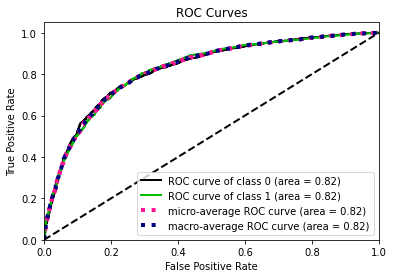

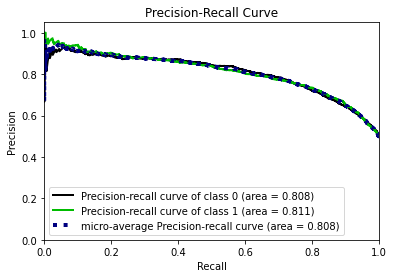

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

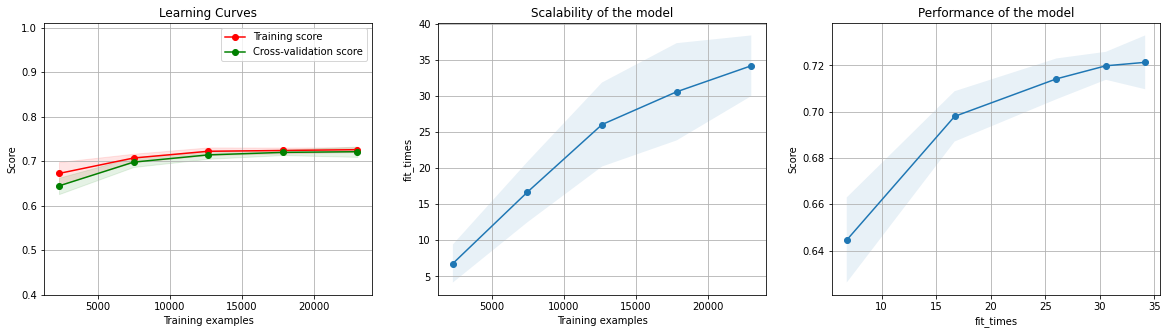

In [49]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [55]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    random_state = 42
                    ).fit(X_train, Y_train)


CPU times: user 16.4 s, sys: 12.4 ms, total: 16.4 s
Wall time: 47.2 s


In [56]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 44.2 ms, sys: 21.3 ms, total: 65.5 ms
Wall time: 49.3 ms


In [51]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8266425441499402
Test AUC Score 0.8224570631883099
 
Acuracy  0.752998435598818
ROC_AUC  0.8224570631883099
PR  0.811491458276894
 
[[2157  720]
 [ 701 2175]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2877
           1       0.75      0.76      0.75      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



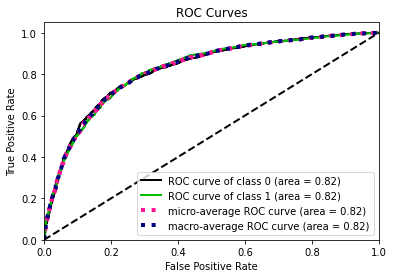

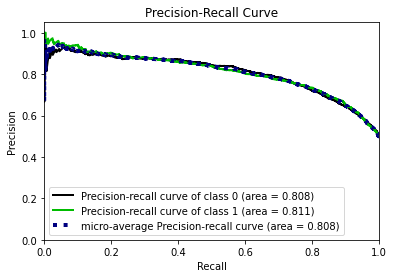

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

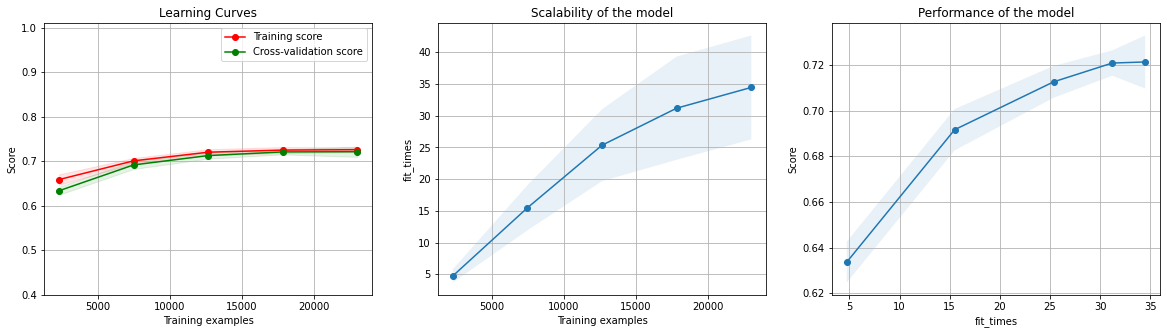

In [52]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

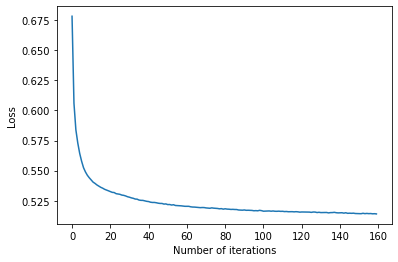

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

In [54]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 34.5 ms, sys: 8.65 ms, total: 43.1 ms
Wall time: 34 ms
